# Group Details

**Group ID:** 24

**Group name:** 24

**Group members that contributed to the assignment (full name):** Rasmus Solvang, Cornelius Bertram and Mikkel Frandsen


# Part 1


Consider the following activities extracted from the Dreyers log introduced and examined in the paper The Analysis of a Real Life Declarative Process:

```python
Fill out application
Architect Review
Lawyer Review
Reject
Applicant informed
Change phase to Abort
Change Phase to Payout
First payment
Undo payment 
Change Phase to End Report
Account number changed
Approve changed account 
Execute abandon
Change phase to Abandon
```


## Task 1


Using these activities, model a simple workflow of an application process as a Petri net. It does not need to follow exactly the process as described in the paper and you may add additional details yourself, but you should ensure that your process captures at least the following rules:

1. Fill out application should always be the first event of the case. 
2. Lawyer Review and Architect Review can not occur unless Fill out application happened before.
3. Lawyer Review and Architect Review should never occur together.
4. Reject should always eventually be followed by Applicant informed and Change phase to Abort.
5. First payment should only occur once, unless Undo payment is executed afterwards, in which case it may be repeated once more.
6. If Account number changed happens, then afterwards Approve changed account needs to be executed and we can no longer execute First payment until the approval has happened.
7. Change Phase to Payout should always eventually be followed by First payment.
8. After Change Phase to Payout has happened, Change Phase to End Report should not happen before we do First Payment. If Change Phase to Payout did not happen then Change Phase to End Report is not restricted by First payment.

Create a copy of your Petrinet with one additional rule:

9. Execute Abandon may happen at any time, after it is executed only Change phase to Abandon may happen.

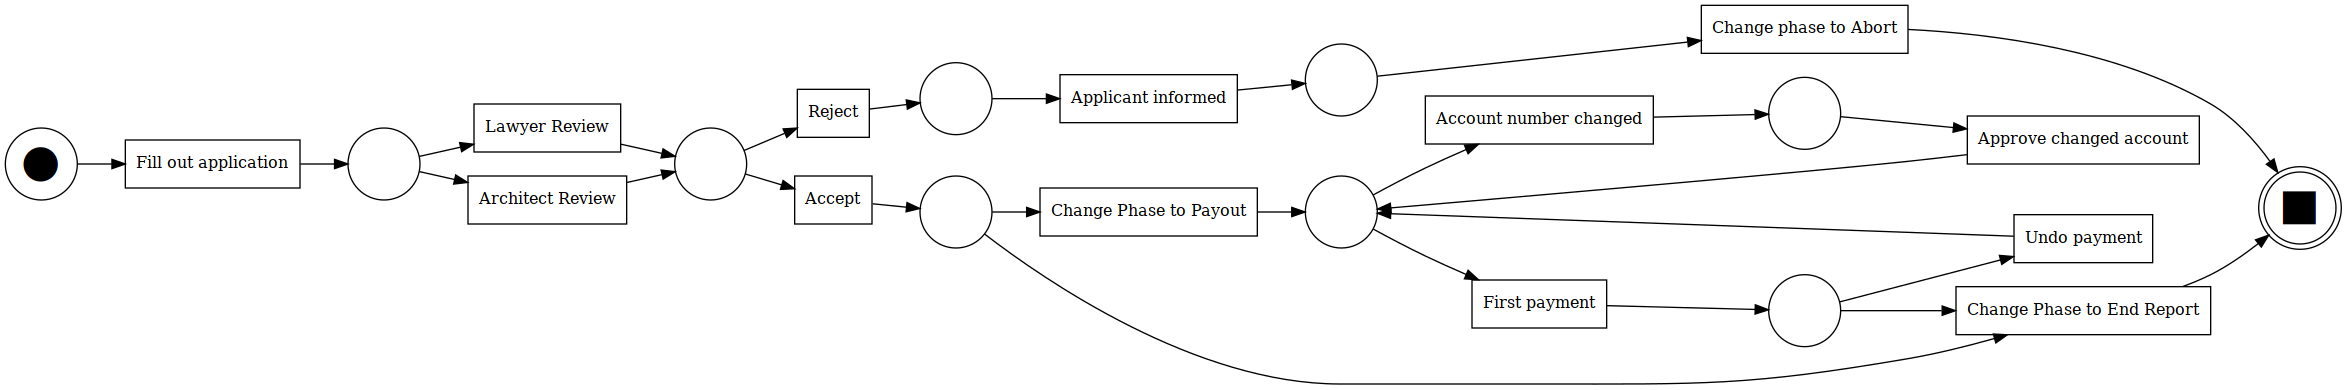

In [1]:
import pandas as pd
import pm4py
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Create a Petri net
net = PetriNet("petri_net_rules_1_to_8")

# Create transitions
t_fill_out_application = PetriNet.Transition("t_fill_out_application", "Fill out application")
t_architect_review = PetriNet.Transition("t_architect_review", "Architect Review")
t_lawyer_review = PetriNet.Transition("t_lawyer_review", "Lawyer Review")
t_reject = PetriNet.Transition("t_reject", "Reject")
t_accept = PetriNet.Transition("t_accept", "Accept")
t_applicant_informed = PetriNet.Transition("t_applicant_informed", "Applicant informed")
t_change_phase_to_abort = PetriNet.Transition("t_change_phase_to_abort", "Change phase to Abort")
t_change_phase_to_payout = PetriNet.Transition("t_change_phase_to_payout", "Change Phase to Payout")
t_first_payment = PetriNet.Transition("t_first_payment", "First payment")
t_undo_payment = PetriNet.Transition("t_undo_payment", "Undo payment")
t_change_phase_to_end_report = PetriNet.Transition("t_change_phase_to_end_report", "Change Phase to End Report")
t_account_number_changed = PetriNet.Transition("t_account_number_changed", "Account number changed")
t_approve_changed_account = PetriNet.Transition("t_approve_changed_account", "Approve changed account")


net.transitions.add(t_fill_out_application)
net.transitions.add(t_architect_review)
net.transitions.add(t_lawyer_review)
net.transitions.add(t_reject)
net.transitions.add(t_accept)
net.transitions.add(t_applicant_informed)
net.transitions.add(t_change_phase_to_abort)
net.transitions.add(t_change_phase_to_payout)
net.transitions.add(t_first_payment)
net.transitions.add(t_undo_payment)
net.transitions.add(t_change_phase_to_end_report)
net.transitions.add(t_account_number_changed)
net.transitions.add(t_approve_changed_account)


# Create places
p1 = PetriNet.Place("p1")
p2 = PetriNet.Place("p2")
p3 = PetriNet.Place("p3")
p4 = PetriNet.Place("p4")
p5 = PetriNet.Place("p5")
p6 = PetriNet.Place("p6")
p7 = PetriNet.Place("p7")
p8 = PetriNet.Place("p8")
p9 = PetriNet.Place("p9")
p10 = PetriNet.Place("p10")


net.places.add(p1)
net.places.add(p2)
net.places.add(p3)
net.places.add(p4)
net.places.add(p5)
net.places.add(p6)
net.places.add(p7)
net.places.add(p8)
net.places.add(p9)
net.places.add(p10)

# Rule 1
petri_utils.add_arc_from_to(p1, t_fill_out_application, net)
petri_utils.add_arc_from_to(t_fill_out_application, p2, net)

#Add rules 2-8 to the Petri net
# Laywer review (first OR)
petri_utils.add_arc_from_to(p2, t_lawyer_review, net)
petri_utils.add_arc_from_to(t_lawyer_review, p3, net)
# Architect review (first OR)
petri_utils.add_arc_from_to(p2, t_architect_review, net)
petri_utils.add_arc_from_to(t_architect_review, p3, net)
# Accept application (second OR)
petri_utils.add_arc_from_to(p3, t_accept, net)
petri_utils.add_arc_from_to(t_accept, p4, net)
# Reject application (second OR)
petri_utils.add_arc_from_to(p3, t_reject, net)
petri_utils.add_arc_from_to(t_reject, p9, net)
# Change phase (second OR)
petri_utils.add_arc_from_to(p4, t_change_phase_to_payout, net)
petri_utils.add_arc_from_to(t_change_phase_to_payout, p5, net)

petri_utils.add_arc_from_to(p5, t_account_number_changed, net)
petri_utils.add_arc_from_to(t_account_number_changed, p6, net)

petri_utils.add_arc_from_to(p6, t_approve_changed_account, net)
petri_utils.add_arc_from_to(t_approve_changed_account, p5, net)

petri_utils.add_arc_from_to(p4, t_change_phase_to_end_report, net)
petri_utils.add_arc_from_to(t_change_phase_to_end_report, p8, net)

petri_utils.add_arc_from_to(p5, t_first_payment, net)
petri_utils.add_arc_from_to(t_first_payment, p7, net)

petri_utils.add_arc_from_to(p7, t_undo_payment, net)
petri_utils.add_arc_from_to(t_undo_payment, p5, net)

petri_utils.add_arc_from_to(p7, t_change_phase_to_end_report, net)

petri_utils.add_arc_from_to(p9, t_applicant_informed, net)
petri_utils.add_arc_from_to(t_applicant_informed, p10, net)

petri_utils.add_arc_from_to(p10, t_change_phase_to_abort, net)
petri_utils.add_arc_from_to(t_change_phase_to_abort, p8, net)






# Initial and final markings
initial_marking = Marking()
initial_marking[p1] = 1

final_marking = Marking()
final_marking[p8] = 1

# Visualization parameters


# Generate and view visualization
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)



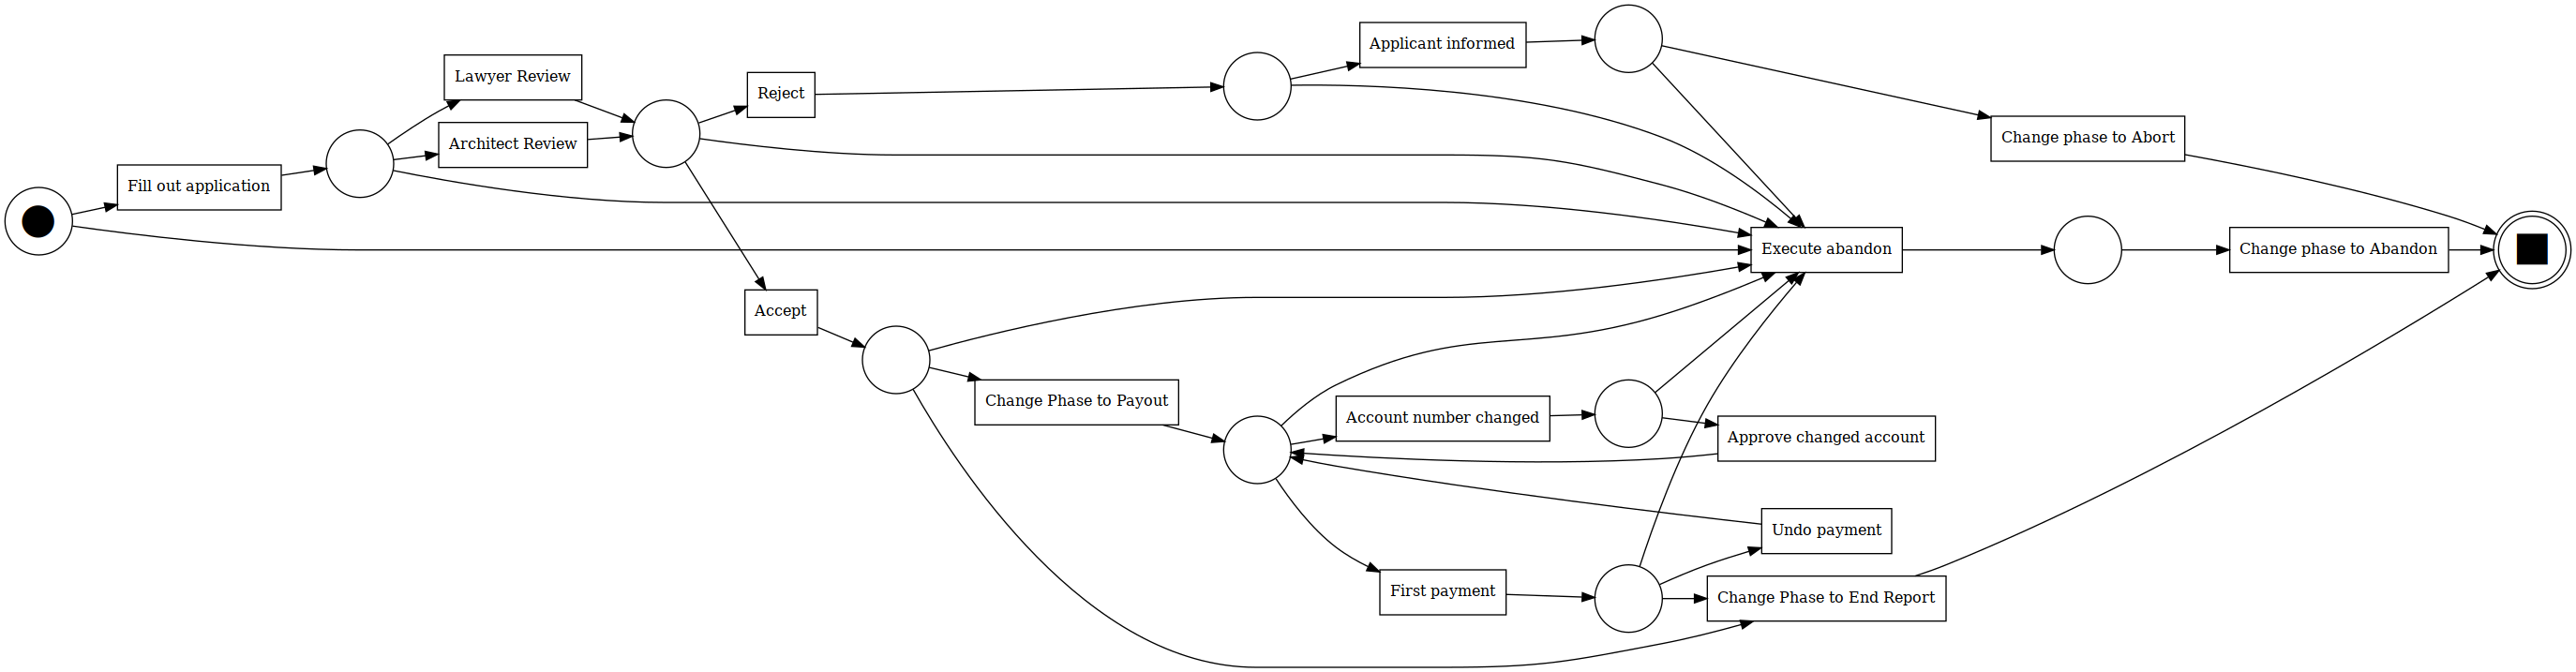

In [2]:
p11 = PetriNet.Place("p11")
net.places.add(p11)

t_execute_abandon = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_change_phase_to_abandon = PetriNet.Transition("t_change_phase_to_abandon", "Change phase to Abandon")
net.transitions.add(t_execute_abandon)
net.transitions.add(t_change_phase_to_abandon)


#Add rule 9 to the Petri net
petri_utils.add_arc_from_to(p1, t_execute_abandon, net)
petri_utils.add_arc_from_to(p2, t_execute_abandon, net)
petri_utils.add_arc_from_to(p3, t_execute_abandon, net)
petri_utils.add_arc_from_to(p4, t_execute_abandon, net)
petri_utils.add_arc_from_to(p5, t_execute_abandon, net)
petri_utils.add_arc_from_to(p6, t_execute_abandon, net)
petri_utils.add_arc_from_to(p7, t_execute_abandon, net)
petri_utils.add_arc_from_to(p9, t_execute_abandon, net)
petri_utils.add_arc_from_to(p10, t_execute_abandon, net)

petri_utils.add_arc_from_to(t_execute_abandon, p11, net)
petri_utils.add_arc_from_to(p11, t_change_phase_to_abandon, net)

petri_utils.add_arc_from_to(t_change_phase_to_abandon, p8, net)



# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

## Task 2


For each rule describe how the rule is implemented (as a short paragraph for each rule).
\
\
**Rule 1**
\
This is done, by placing the inital marker in the place just before **Fill out application**, which only leads to **Fill out application**.
\
**Rule 2**
\
This is done by using sequential routing from **Fill out application** to **Lawyer/Architect Review** 
\
**Rule 3**
\
This is done using conditional routing, from **Fill out application** to either **Lawyer or Architect Review**. It was assumed that "should never occur together" meant only either one of them should run.  
\
**Rule 4**
\
This is done using sequential routing from **Reject to Applicant Informed** and then to **Change phase to Abort** and since there is no accepting state in between it follows the rule. 
\
**Rule 5**
\
This is done using iterative routing, from **Change phase to Payout** to **First payment** which then leads to a conditional that goes to either **Undo payment** or **Change phase to End report**. If **Undo payment** is chosen, the iterative routing goes back to **Change Phase to Payout**. 
\
**Rule 6**
\
This is done using iterative routing, from **Change phase to Payout** to either **First payment** or **Account Number Changed**. If **Account Number Changed** is chosen, then a sequential routing goes to **Approve changed account**, which then leads back to **Change phase to Payout**, completing the loop.
\
**Rule 7**
\
This is done using sequential routing from **Change phase to Payout** through rule 6 to **First payment**
\
**Rule 8**
\
This is done using conditional routing which leads into sequential routing. The conditional is that either we go directly to **Change phase to End Report** or we go through a sequence containing firstly **Change Phase to Payout**, then **First payment** and finally **Change Phase to End Report**
\
**Rule 9**
\
This was done by giving all places, except the final place, a route to **Execute Abandon** which then sequentially leads to **Change Phase to Abandon**. 

## Task 3

Answer the following questions and add a short (1 paragraph) argument for your answer:

**Is your Petri net live and/or quasi-live?**
\
It is quasi-live, but not live. This is because we have two seperate paths, that only unite at the final marking (Accept/Reject), which means that if one route is chosen, the other one cannot be reached. However from the start marking, we have the potential to choose all markings. 

**Is your Petri net bounded and/or safe?**
\
It is both bounded and safe. It is safe (and then hence bounded) because, there is no use of parrellel routing (meaning we create more than one active marking at any point)
\
**Is your Petri net a WorkFlow net?**
\
It is a WorkFlow net, since there is sink place in which all routes leads to and has no outgoing arcs. There is also a source place that has no ingoing arcs. 


# Part 2: Modelling Event Patterns as DCR Graphs

## Task 1

Model the rules from part 1 as individual DCR Graphs. (Yielding 9 graphs in total.)  Write a short description for each explaining the semantics. For convenience you may want to use an “other” event in some of your models that represents all events not explicitly mentioned.

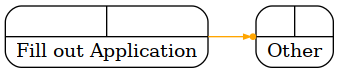

In [3]:
# Rule 1
import pm4py
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Fill out Application", "Other"
]

graph.conditions = {"Other": {"Fill out Application"}}

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
        graph.marking.included.add(event)
    

pm4py.view_dcr(graph)

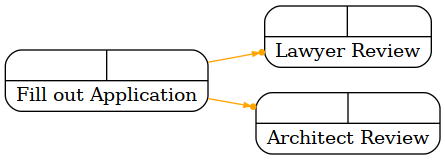

In [4]:

# 2
graph = DcrGraph()

events = [
    "Fill out Application", "Lawyer Review", "Architect Review"
]

graph.conditions = {"Lawyer Review": {"Fill out Application"}, "Architect Review": {"Fill out Application"}}
for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
        graph.marking.included.add(event)
    
pm4py.view_dcr(graph)

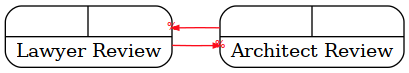

In [5]:

# 3
graph = DcrGraph()

events = [
    "Lawyer Review", "Architect Review"
]

graph.excludes = {"Lawyer Review": {"Architect Review"}, "Architect Review": {"Lawyer Review"}}
for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
        graph.marking.included.add(event)
    
pm4py.view_dcr(graph)


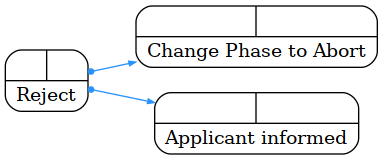

In [15]:
# 4
graph = DcrGraph()

events = [
    "Reject", "Applicant informed", "Change Phase to Abort"
]

#graph.includes = {"Reject": {"Applicant informed", "Change Phase to Abort"}}
graph.responses = {"Reject": {"Applicant informed", "Change Phase to Abort"}}
for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)
    
pm4py.view_dcr(graph)

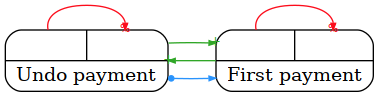

In [18]:
# Rule 5
import pm4py
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "First payment", "Undo payment"
]

graph.excludes = {"First payment": {"First payment"}, "Undo payment" : {"Undo payment"}}
graph.includes = {"First payment": {"Undo payment"}, "Undo payment" : {"First payment"}}
graph.responses = {"Undo payment" : {"First payment"}}

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    #if event == "First payment":
    graph.marking.included.add(event)
    

pm4py.view_dcr(graph)


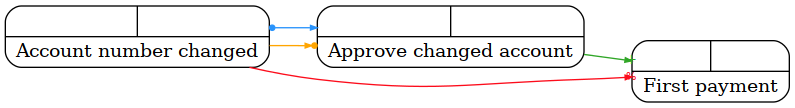

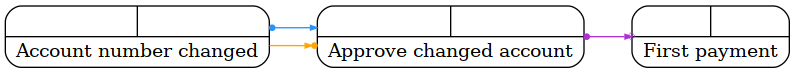

In [34]:
# Rule 6
import pm4py
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Account number changed", "Approve changed account", "First payment"
]

graph.conditions = {"Approve changed account":{"Account number changed"}}
graph.responses = {"Account number changed": {"Approve changed account"}} 
graph.includes = {"Approve changed account":{"First payment"}}
graph.excludes = {"Account number changed":{"First payment"}}

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
        graph.marking.included.add(event)
    

pm4py.view_dcr(graph)

# Rule 6
import pm4py
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Account number changed", "Approve changed account", "First payment"
]

graph.conditions = {"Approve changed account":{"Account number changed"}}
graph.responses = {"Account number changed": {"Approve changed account"}} 
graph.milestones = {"Approve changed account":{"First payment"}}

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
        graph.marking.included.add(event)
    

pm4py.view_dcr(graph)



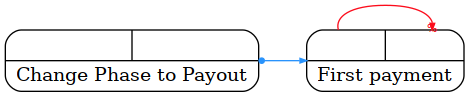

In [23]:
# Rule 7
import pm4py
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Change Phase to Payout", "First payment"
]

graph.excludes = {"First payment" : {"First payment"}}
graph.responses = {"Change Phase to Payout" : {"First payment"}}

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    #if event == "Change Phase to Payout":
    graph.marking.included.add(event)
    

pm4py.view_dcr(graph)


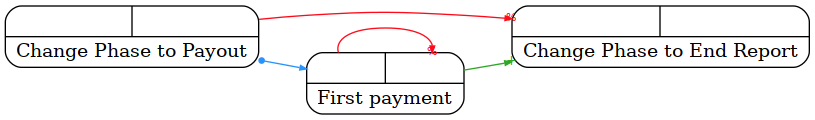

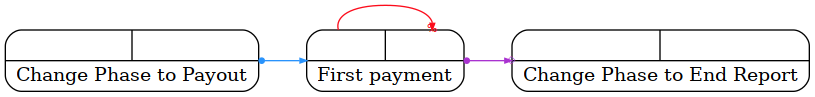

In [33]:
# Rule 8
import pm4py
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Change Phase to Payout", "Change Phase to End Report", "First payment"
]

graph.excludes = {"Change Phase to Payout" : {"Change Phase to End Report"}, "First payment" : {"First payment"}}
graph.includes = {"First payment" : {"Change Phase to End Report"}}
graph.responses = {"Change Phase to Payout" : {"First payment"}}

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    #if event == "Change Phase to Payout" or event == "Change Phase to End Report":
    graph.marking.included.add(event)
    

pm4py.view_dcr(graph)

# Rule 8
import pm4py
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Change Phase to Payout", "Change Phase to End Report", "First payment"
]

graph.excludes = { "First payment" : {"First payment"}}
graph.milestones = {"First payment" : {"Change Phase to End Report"}}
graph.responses = {"Change Phase to Payout" : {"First payment"}}

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    #if event == "Change Phase to Payout" or event == "Change Phase to End Report":
    graph.marking.included.add(event)
    

pm4py.view_dcr(graph)



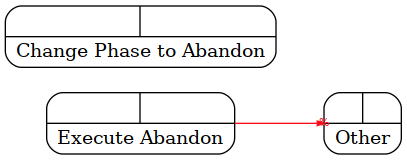

In [31]:
# Rule 9
import pm4py
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Execute Abandon", "Change Phase to Abandon", "Other"
]

graph.excludes = {"Execute Abandon" : {"Execute Abandon"}, "Execute Abandon" : {"Other"}}

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)
    

pm4py.view_dcr(graph)


## Task 2

Combine the separate patterns into a single model.

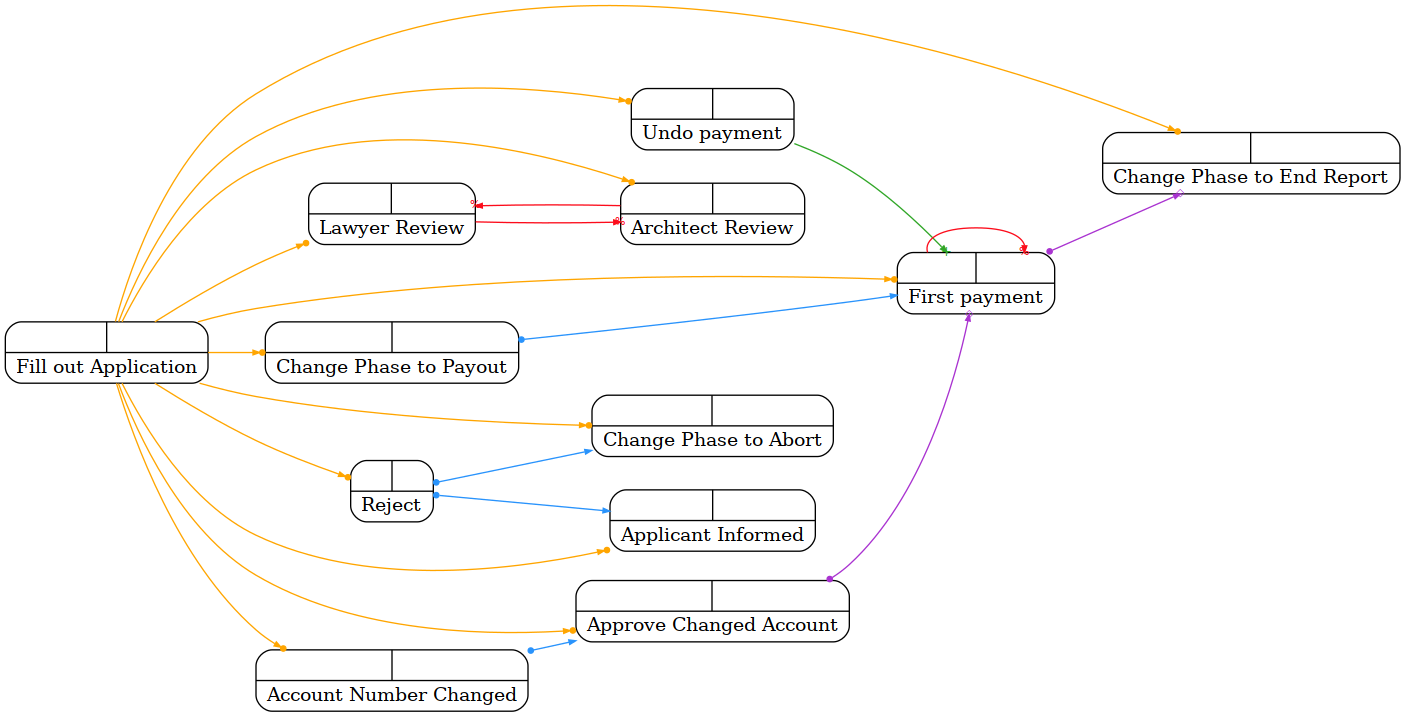

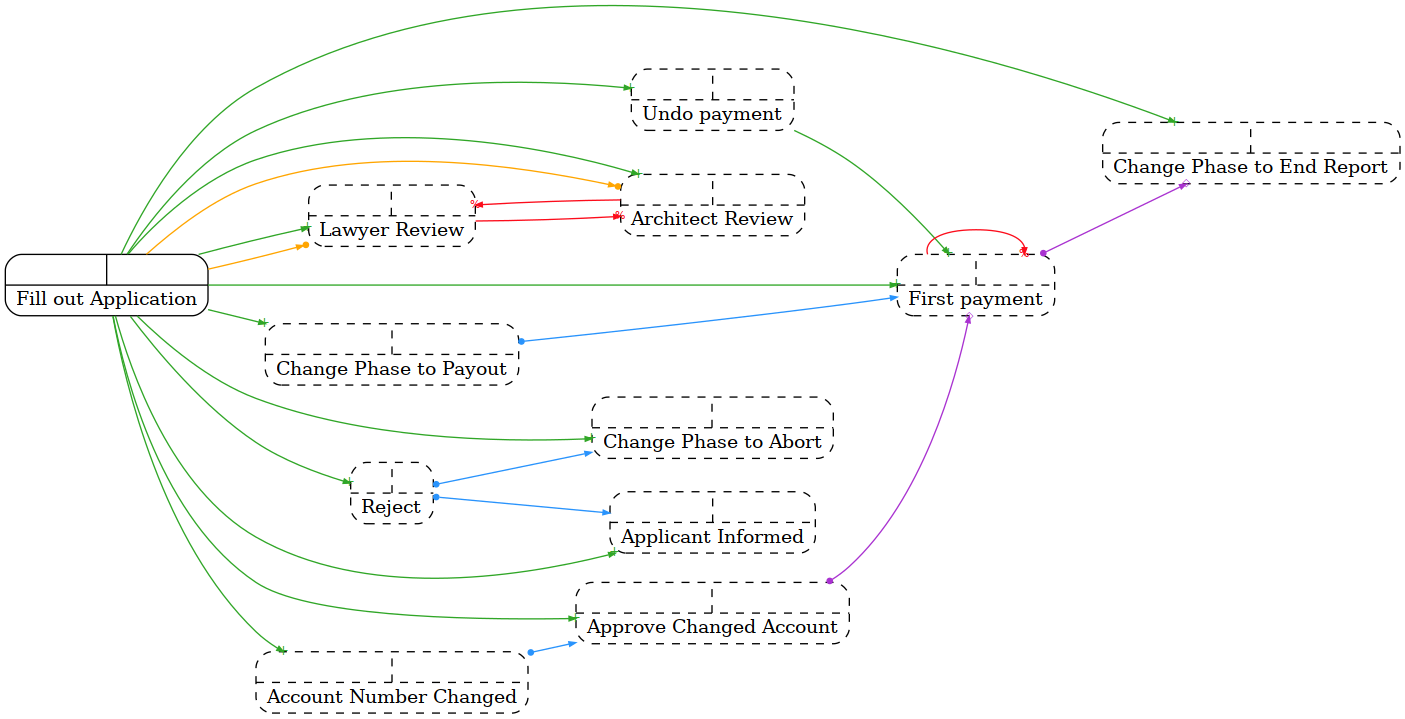

In [68]:
from pm4py.objects.dcr.extended.obj import ExtendedDcrGraph
graph = ExtendedDcrGraph()

events = [
    "Fill out Application", "Lawyer Review", "Architect Review", "Applicant Informed", "Reject", 
    "Change Phase to Abort", "Undo payment", "First payment", "Account Number Changed", 
    "Approve Changed Account", "Change Phase to Payout", "Change Phase to End Report"
]

#Rule 1
for event in events:
    if event != "Fill out Application":
        graph.conditions[event] = {"Fill out Application"}
#Rule 2
graph.conditions["Lawyer Review"] = {"Fill out Application"}
graph.conditions["Architect Review"] = {"Fill out Application"}
#Rule 3
graph.excludes["Architect Review"] = {"Lawyer Review"}
graph.excludes[ "Lawyer Review"] = {"Architect Review"}
#Rule 4
graph.responses["Reject"] = {"Change Phase to Abort", "Applicant Informed"}
#Rule 5
graph.excludes["First payment"] = {"First payment"}
graph.includes["Undo payment"] = {"First payment"}
#Rule 6
graph.responses["Account Number Changed"] = {"Approve Changed Account"}
graph.milestones["Approve Changed Account"] = {"First payment"} 
#Rule 7
graph.responses["Change Phase to Payout"] = {"First payment"}
#Rule 8
graph.milestones["First payment"] = {"Change Phase to End Report"}

graph.includes


for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)
    

pm4py.view_dcr(graph)

from pm4py.objects.dcr.extended.obj import ExtendedDcrGraph
graph = ExtendedDcrGraph()

events = [
    "Fill out Application", "Lawyer Review", "Architect Review", "Applicant Informed", "Reject", 
    "Change Phase to Abort", "Undo payment", "First payment", "Account Number Changed", 
    "Approve Changed Account", "Change Phase to Payout", "Change Phase to End Report"
]

#Rule 1
graph.includes["Fill out Application"] = {"Lawyer Review", "Architect Review", "Applicant Informed", "Reject", 
    "Change Phase to Abort", "Undo payment", "First payment", "Account Number Changed", 
    "Approve Changed Account", "Change Phase to Payout", "Change Phase to End Report"}
#Rule 2
graph.conditions["Lawyer Review"] = {"Fill out Application"}
graph.conditions["Architect Review"] = {"Fill out Application"}
#Rule 3
graph.excludes["Architect Review"] = {"Lawyer Review"}
graph.excludes[ "Lawyer Review"] = {"Architect Review"}
#Rule 4
graph.responses["Reject"] = {"Change Phase to Abort", "Applicant Informed"}
#Rule 5
graph.excludes["First payment"] = {"First payment"}
graph.includes["Undo payment"] = {"First payment"}
#Rule 6
graph.responses["Account Number Changed"] = {"Approve Changed Account"}
graph.milestones["Approve Changed Account"] = {"First payment"} 
#Rule 7
graph.responses["Change Phase to Payout"] = {"First payment"}
#Rule 8
graph.milestones["First payment"] = {"Change Phase to End Report"}


graph.includes


for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    if event == "Fill out Application":
        graph.marking.included.add(event)
    

pm4py.view_dcr(graph)

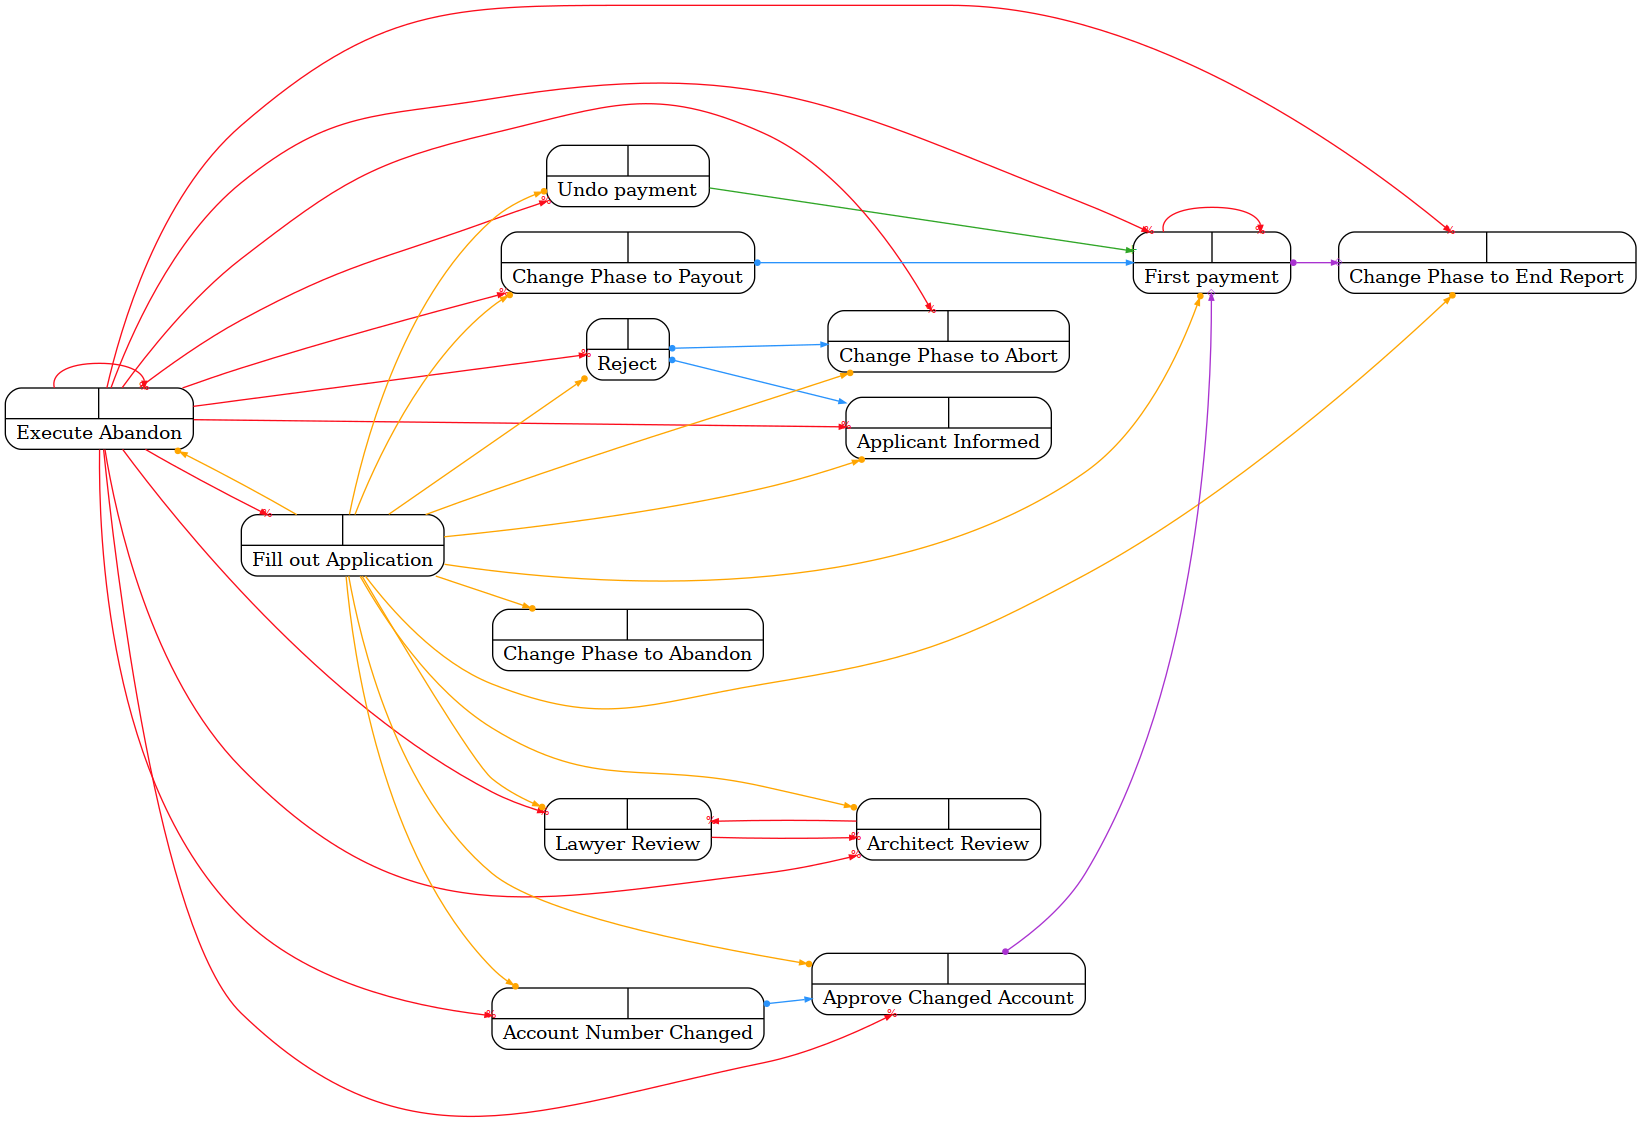

In [67]:
from pm4py.objects.dcr.extended.obj import ExtendedDcrGraph
graph = ExtendedDcrGraph()

events = [
    "Fill out Application", "Lawyer Review", "Architect Review", "Applicant Informed", "Reject", 
    "Change Phase to Abort", "Undo payment", "First payment", "Account Number Changed", 
    "Approve Changed Account", "Change Phase to Payout", "Change Phase to End Report", "Execute Abandon", 
    "Change Phase to Abandon"
]
''' {"Lawyer Review": {"Fill out Application"}, 
                    "Architect Review": {"Fill out Application"},
                    "Reject" : {"Fill out Application"},
                    "Account Number Changed" : {"Fill out Application"},
                    "First payment" : {"Fill out Application"},
                    "Change Phase to End Report" : {"Fill out Application"},
                    "Execute Abandon" :{"Fill out Application"}}'''
#Rule 1
for event in events:
    if event != "Fill out Application":
        graph.conditions[event] = {"Fill out Application"}
#Rule 2
graph.conditions["Lawyer Review"] = {"Fill out Application"}
graph.conditions["Architect Review"] = {"Fill out Application"}
#Rule 3
graph.excludes["Architect Review"] = {"Lawyer Review"}
graph.excludes[ "Lawyer Review"] = {"Architect Review"}
#Rule 4
graph.responses["Reject"] = {"Change Phase to Abort", "Applicant Informed"}
#Rule 5
graph.excludes["First payment"] = {"First payment"}
graph.includes["Undo payment"] = {"First payment"}
#Rule 6
graph.responses["Account Number Changed"] = {"Approve Changed Account"}
graph.milestones["Approve Changed Account"] = {"First payment"} 
#Rule 7
graph.responses["Change Phase to Payout"] = {"First payment"}
#Rule 8
graph.milestones["First payment"] = {"Change Phase to End Report"}
#Rule 9
graph.excludes["Execute Abandon"] = {"Fill out Application", "Lawyer Review", "Architect Review", "Applicant Informed", "Reject", 
    "Change Phase to Abort", "Undo payment", "First payment", "Account Number Changed", 
    "Approve Changed Account", "Change Phase to Payout", "Change Phase to End Report", "Execute Abandon"}


graph.includes


for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)
    

pm4py.view_dcr(graph)

## Task 3

Answer the following questions:

**Which relations did you not use in your models?**
\
Spawn relations


**Could some of the rules have been modelled in more than one way? If so, give one or two examples.**
\
In rule 7, we can delete the exclude from Change Phase to Payout to Change Phase to End Report, and change the include fom First payment to Change Phase To End Report to a milestone.
This results in the same exact behavoir (for the first cycle only) and both follow the rules. 
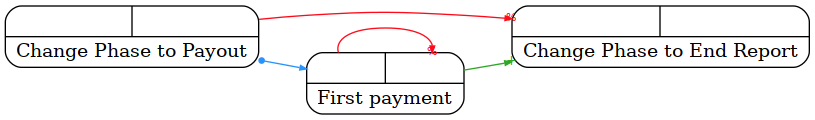
![alt text](rule_7_edit_1.png)
\
In rule 1 we could have had all events but fill out application be exluded to begin with, and then swapped the conditon form Fill out Application to all other events be an include. 
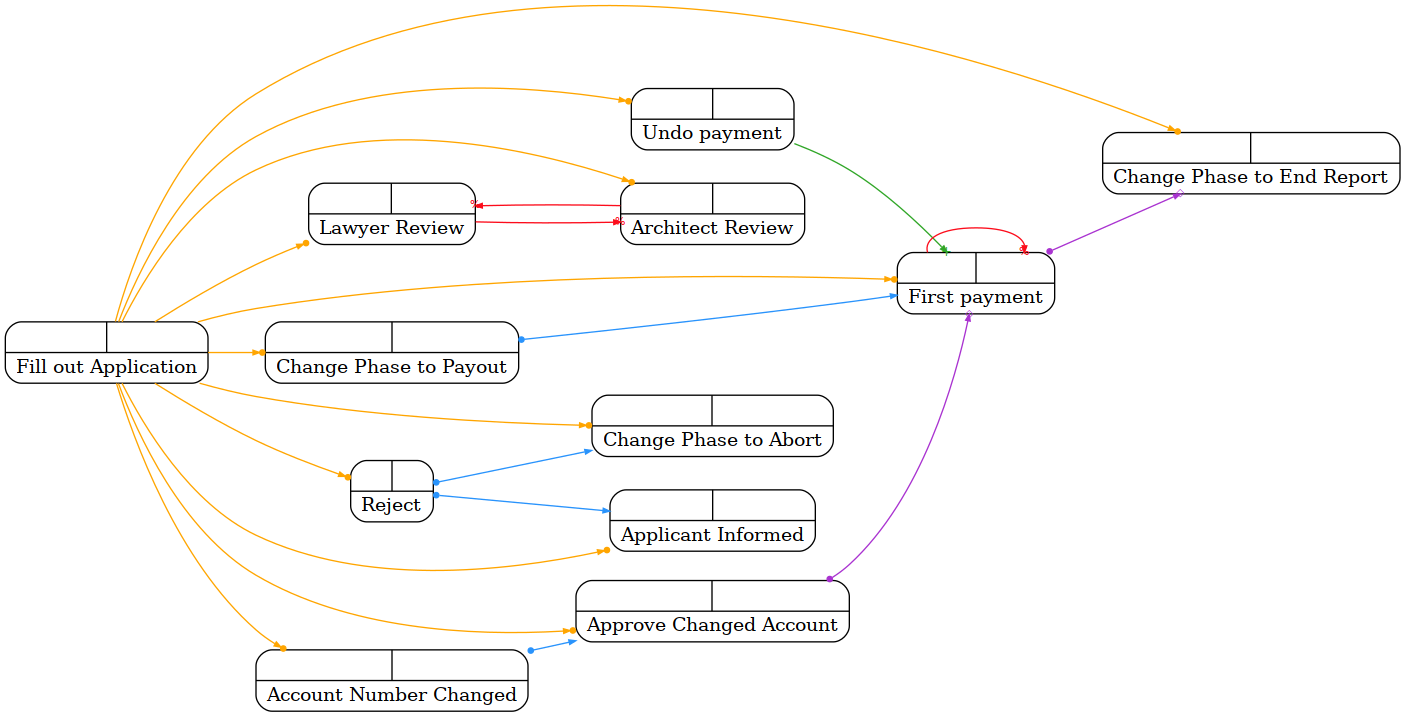
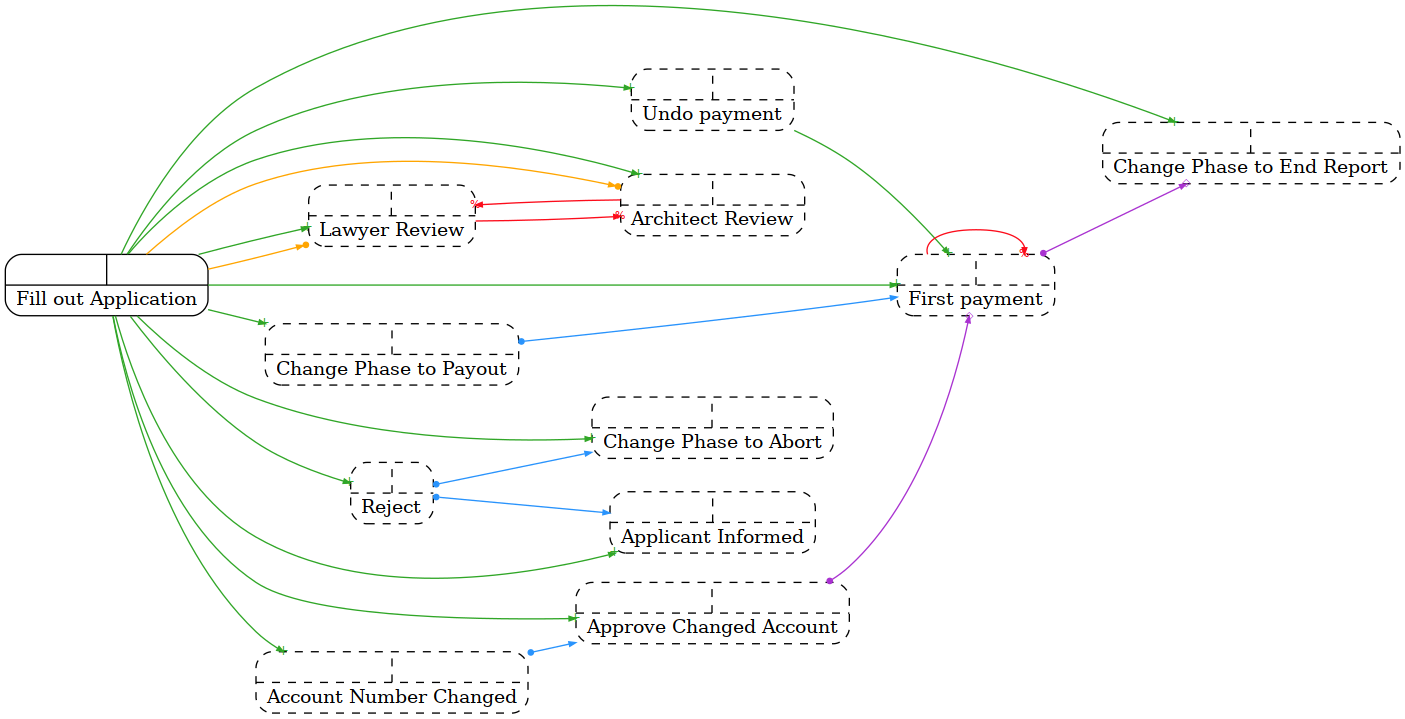

**How does your model differ from the Petri net? Do they exhibit the same language?**
\
An example can be seen by looking at the flow. In our Petri net a review has to be done, before the transition reject can be reached. However in our DCR graph, the event reject can be reached immediately after Fill out Application. 
\
In other words we have made a lot more assumptions about the flow in the petri net, than in the DCR graph. This is due to only the rescitions (rules) being modelled in the DCR graph. We therefore incorparate more flexiability, which is important for a knowlegde based process. 
\
Shortly A DCR graph is decralative meaning that we only model the constraints/rules therefore it is much more close to the rules set.
This is in contrast to a petri net which is imperative, so we have to make a lot of choices that model the flow. 
